# Ensemble Methods Notebook
Welcome to the weekly project on Ensemble Methods. You will be working with a dataset of traffic jams.

## Dataset
The dataset that will be used in this task is `Traffic_Jam.csv`

## Instructions
- Follow the steps outlined below.
- Write your code in the empty code cells.
- Comment on your code to explain your reasoning.

## Dataset Overview
This dataset contains traffic data including various counts of vehicle types across different times and days. Below are samples of these columns:

* `Time`: The timestamp of the traffic count (in intervals).
* `Date`: The day of the month the data was recorded.
* `Day of the Week`: The day of the week for the recorded data.
* `CarCount`: The number of cars counted during the time interval.
* `BikeCount`: The number of bikes counted during the time interval.
* `BusCount`: The number of buses counted during the time interval.
* `TruckCount`: The number of trucks counted during the time interval.
* `Total`: Total vehicles counted during the time interval.
* `Traffic Situation`: Qualitative assessment of the traffic (e.g., normal, congested).

## Goal
The primary goal of this exam is to develop a predictive model capable of determining the `Traffic Situation` based on your choice of features provided in the dataset. Students are expected to apply ensemble methods to build and evaluate their models.

# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset


In [ ]:
df = pd.read_csv('/content/Traffic_Jams.csv')

In [ ]:
df.head()

,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,5,-1.159175,-0.881214,-0.857050,0.498124,-1.192287,3
1,5,-1.136604,-0.969218,-0.938226,1.617112,-0.995318,3
2,5,-1.226890,-0.881214,-0.857050,1.244116,-1.102756,3
3,5,-1.226890,-0.881214,-0.857050,1.617112,-1.031131,3
4,5,-1.204319,-0.881214,-0.938226,1.430614,-1.066943,3


In [ ]:
df

,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,5,-1.159175,-0.881214,-0.857050,0.498124,-1.192287,3
1,5,-1.136604,-0.969218,-0.938226,1.617112,-0.995318,3
2,5,-1.226890,-0.881214,-0.857050,1.244116,-1.102756,3
3,5,-1.226890,-0.881214,-0.857050,1.617112,-1.031131,3
4,5,-1.204319,-0.881214,-0.938226,1.430614,-1.066943,3
...,...,...,...,...,...,...,...
6319,4,-0.865746,0.350849,0.035890,-0.247868,-0.655099,3
6320,4,0.172545,1.142889,-0.207639,0.777871,0.472996,1
6321,4,0.962549,0.086836,0.117066,0.871120,0.974371,1
6322,4,0.939977,0.526858,0.035890,0.777871,1.010184,1


# Exploratory Data Analysis (EDA)

Below are some steps and visualizations to perform EDA on the dataset:

1. **Summary Statistics**: Obtain summary statistics for the dataset to understand the central tendencies and dispersion of numerical features.describe()

2. **Distribution of the Target Variable**: Analyze the distribution of the target variable `Traffic Situation` to understand the class balance.

3. **Correlation Analysis**: Analyze correlations between features.

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
summary_stats = df.describe()
print(summary_stats)

              Date     CarCount    BikeCount     BusCount   TruckCount  \
count  6324.000000  6324.000000  6324.000000  6324.000000  6324.000000   
mean     16.043327    64.355629    12.013283    12.557875    18.658128   
std       8.956907    44.307088    11.363955    12.319831    10.724822   
min       1.000000     5.000000     0.000000     0.000000     0.000000   
25%       8.000000    18.000000     3.000000     1.000000    10.000000   
50%      16.000000    61.000000     9.000000    10.000000    18.000000   
75%      24.000000   101.250000    19.000000    20.000000    27.000000   
max      31.000000   180.000000    70.000000    50.000000    60.000000   

             Total  
count  6324.000000  
mean    107.584915  
std      55.850784  
min      21.000000  
25%      53.000000  
50%     103.000000  
75%     151.000000  
max     279.000000  


In [ ]:
traffic_dist = df['Traffic Situation'].value_counts()

<ipython-input-6-ed02b954824b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Traffic Situation', palette='viridis')


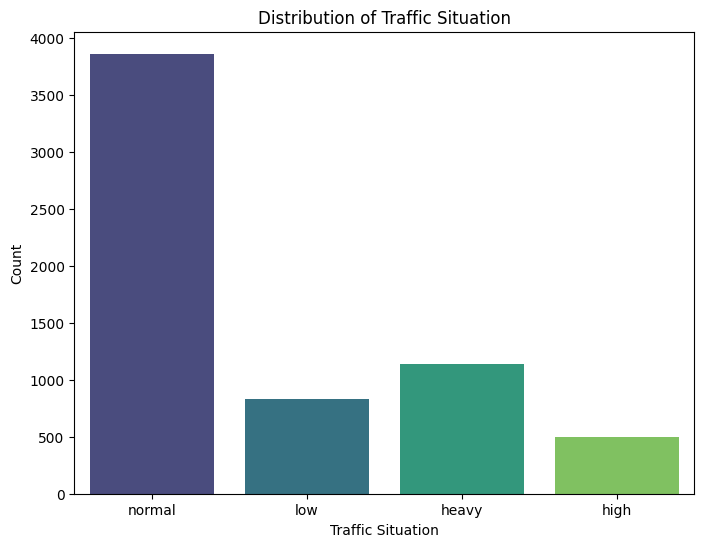

Traffic Situation
normal    3858
heavy     1137
low        834
high       495
Name: count, dtype: int64


In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Traffic Situation', palette='viridis')
plt.title('Distribution of Traffic Situation')
plt.xlabel('Traffic Situation')
plt.ylabel('Count')
plt.show()

print(traffic_dist)

In [ ]:
print(df.dtypes)

Time                 object
Date                  int64
Day of the week      object
CarCount              int64
BikeCount             int64
BusCount              int64
TruckCount            int64
Total                 int64
Traffic Situation    object
dtype: object


In [ ]:
numeric_df = df.select_dtypes(include=[np.number])

In [ ]:
print(df.dtypes)

Time                 object
Date                  int64
Day of the week      object
CarCount              int64
BikeCount             int64
BusCount              int64
TruckCount            int64
Total                 int64
Traffic Situation    object
dtype: object


In [ ]:
df['Time'] = pd.to_datetime(df['Time'], format='%I:%M:%S %p').dt.hour
df['Day of the week'] = pd.Categorical(df['Day of the week']).codes

In [ ]:
label_encoder = LabelEncoder()
df['Traffic Situation'] = label_encoder.fit_transform(df['Traffic Situation'])

In [ ]:
print(df.dtypes)

Time                 int32
Date                 int64
Day of the week       int8
CarCount             int64
BikeCount            int64
BusCount             int64
TruckCount           int64
Total                int64
Traffic Situation    int64
dtype: object


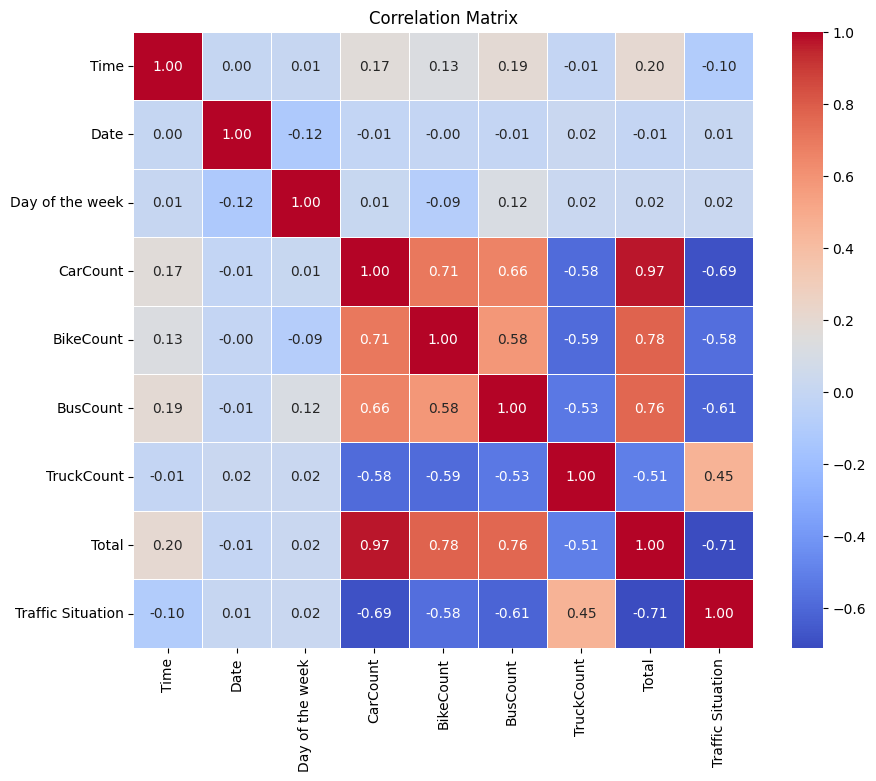

In [ ]:
numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Preprocess the data (if necessary)

Before building models, it's crucial to preprocess the data to ensure it's clean and suitable for training. Follow these steps to prepare the dataset:

1. **Check for Missing Values**: Determine if there are any missing values in the dataset and handle them appropriately. You can choose to fill them with a mean, median, or mode value, or drop rows with missing values if necessary.

2. **Encode Categorical Variables**: Convert categorical variables into numerical representations. This can be done using techniques such as one-hot encoding and lable-encoder.

3. **Feature Scaling**: Standardize or Normalize numerical features if needed to have a consistent scale.

4. **Remove Unnecessary Columns**: Drop any columns that are not relevant for modeling.

In [ ]:
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Time                 0
Date                 0
Day of the week      0
CarCount             0
BikeCount            0
BusCount             0
TruckCount           0
Total                0
Traffic Situation    0
dtype: int64


In [ ]:
df.fillna(df.mean(numeric_only=True), inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
df['Day of the week'] = label_encoder.fit_transform(df['Day of the week'])

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_to_scale = ['CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total']
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

In [ ]:
df.drop(columns=['Date', 'Time'], inplace=True)
print("Updated DataFrame:\n", df.head())

Updated DataFrame:
    Day of the week  CarCount  BikeCount  BusCount  TruckCount     Total  \
0                5 -1.159175  -0.881214 -0.857050    0.498124 -1.192287   
1                5 -1.136604  -0.969218 -0.938226    1.617112 -0.995318   
2                5 -1.226890  -0.881214 -0.857050    1.244116 -1.102756   
3                5 -1.226890  -0.881214 -0.857050    1.617112 -1.031131   
4                5 -1.204319  -0.881214 -0.938226    1.430614 -1.066943   

   Traffic Situation  
0                  3  
1                  3  
2                  3  
3                  3  
4                  3  


# Visualize the Data

Visualizing the data helps in understanding the relationships between features and the target variable. Below are some common visualizations that can be used to gain insights into the dataset:

1. **Count Plots for Categorical Features**: Use count plots to visualize the frequency of categorical features such as the `Traffic Situation`.

2. **Correlation Heatmap**: Create a heatmap to visualize the correlation between numerical features and identify any strong relationships.

<ipython-input-27-ac337115e477>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Traffic Situation', palette='viridis')


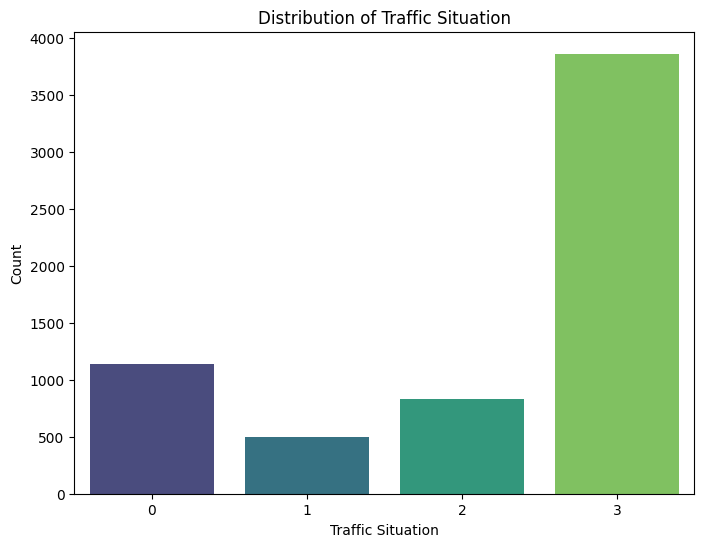

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Traffic Situation', palette='viridis')
plt.title('Distribution of Traffic Situation')
plt.xlabel('Traffic Situation')
plt.ylabel('Count')
plt.show()

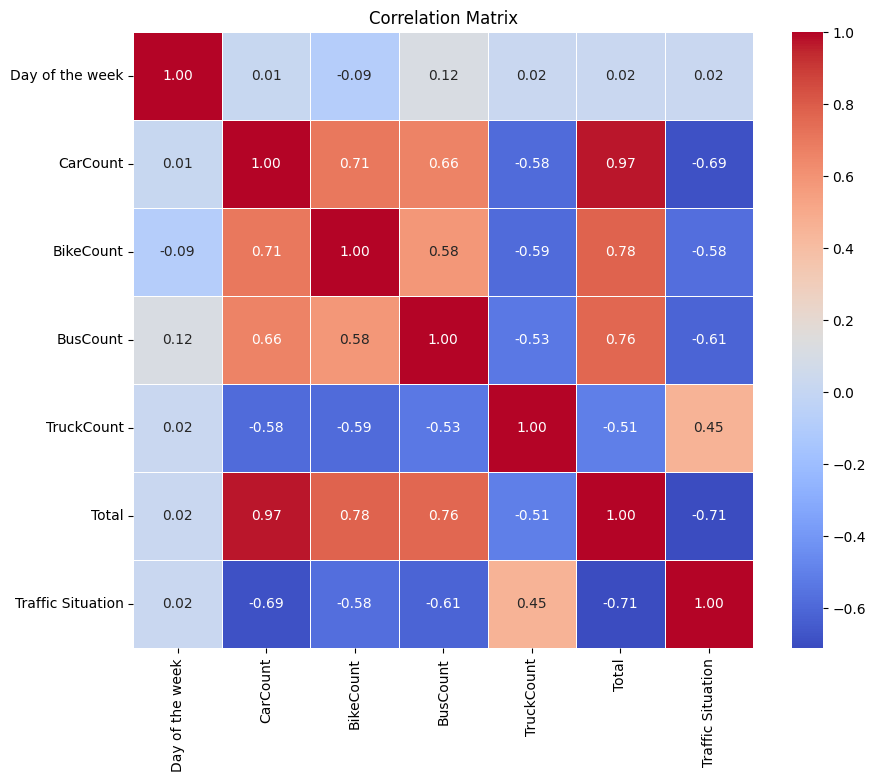

In [ ]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

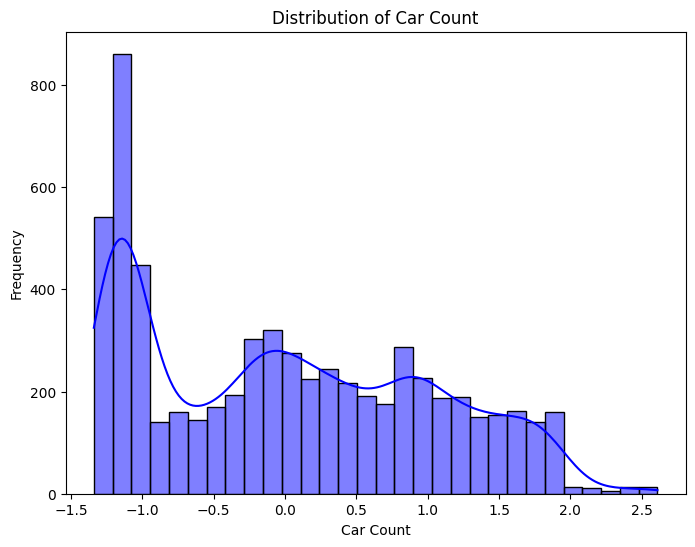

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['CarCount'], bins=30, kde=True, color='blue')
plt.title('Distribution of Car Count')
plt.xlabel('Car Count')
plt.ylabel('Frequency')
plt.show()

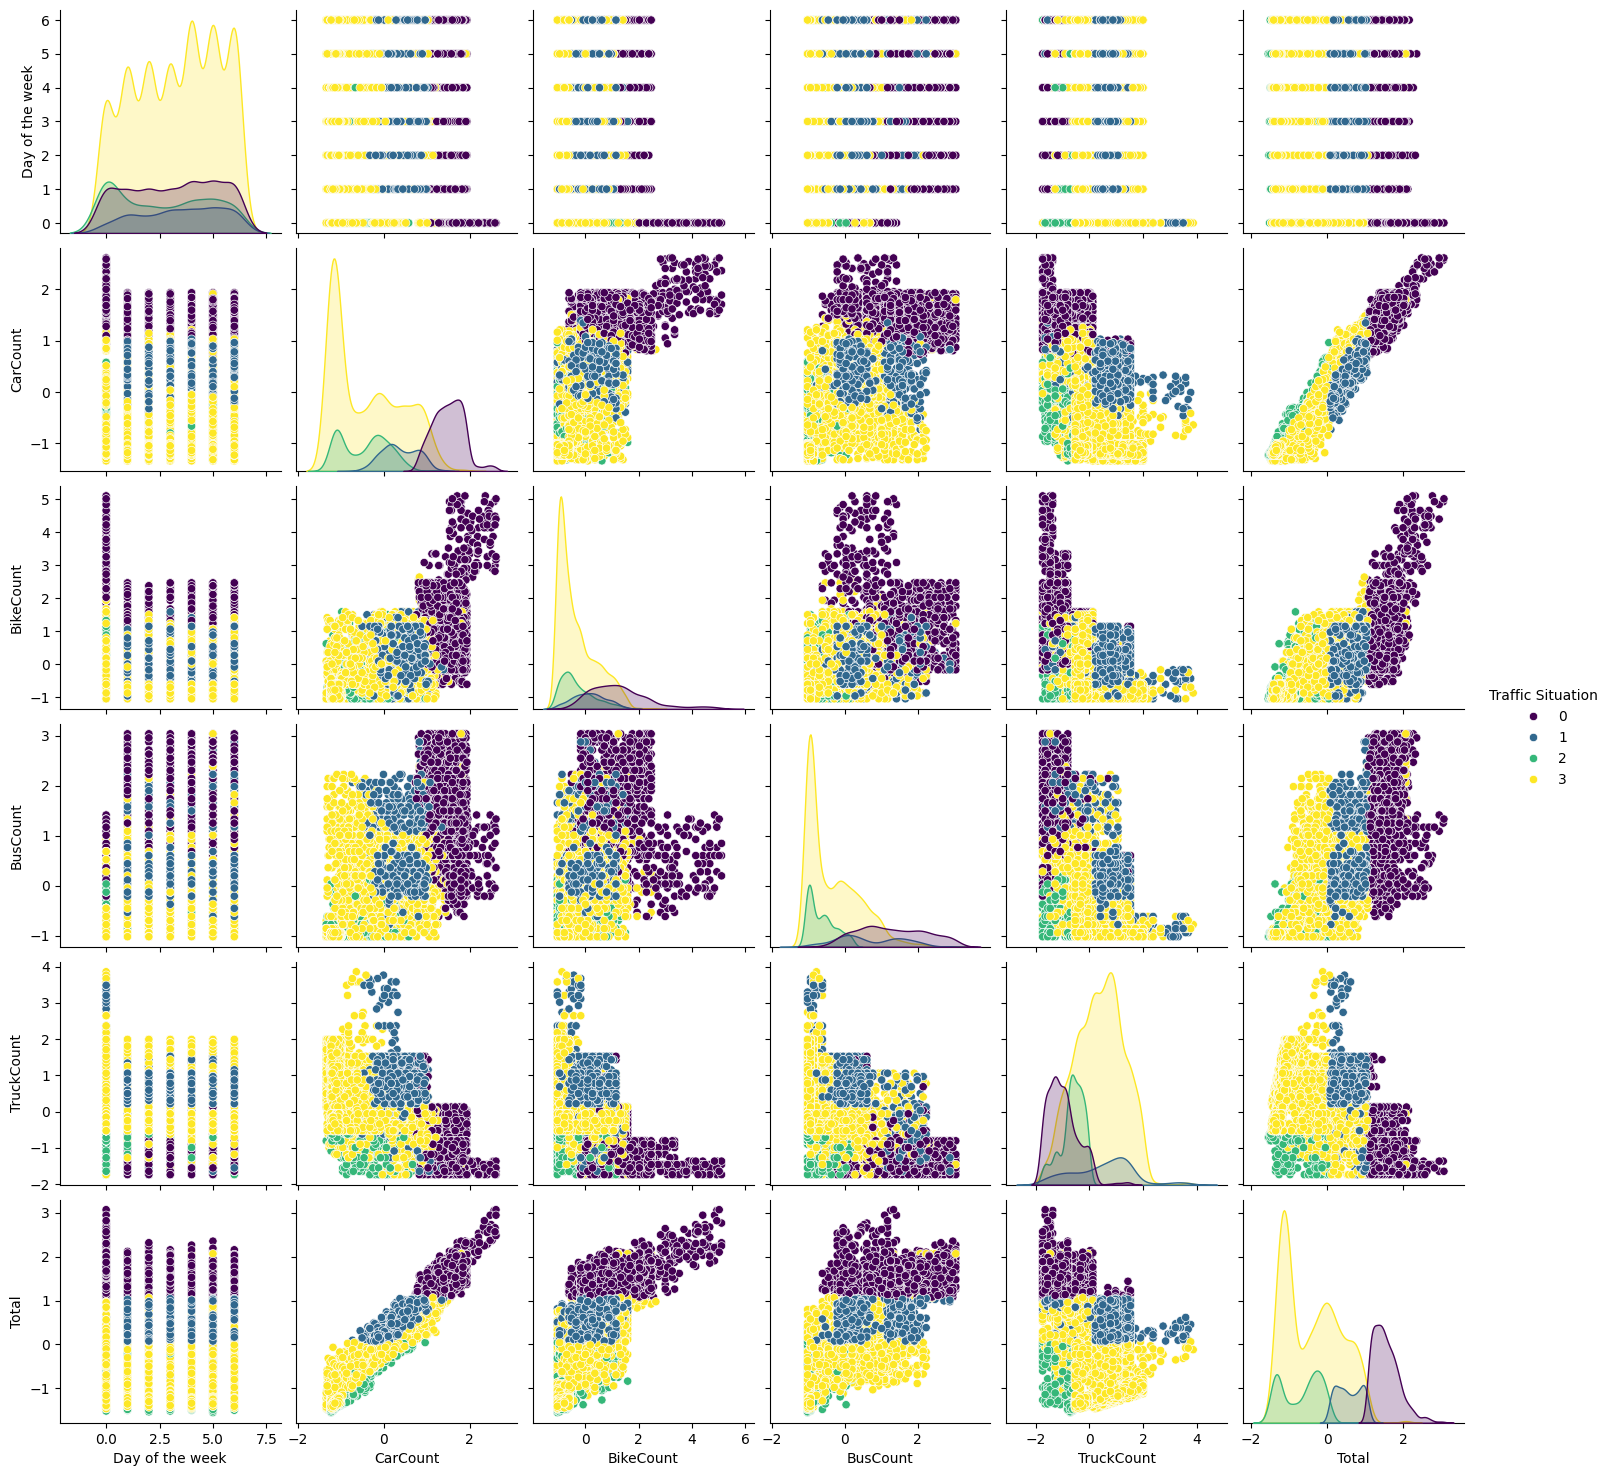

In [ ]:
sns.pairplot(df, hue='Traffic Situation', palette='viridis')
plt.show()

<ipython-input-31-3e72434690c6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Traffic Situation', y='CarCount', palette='viridis')


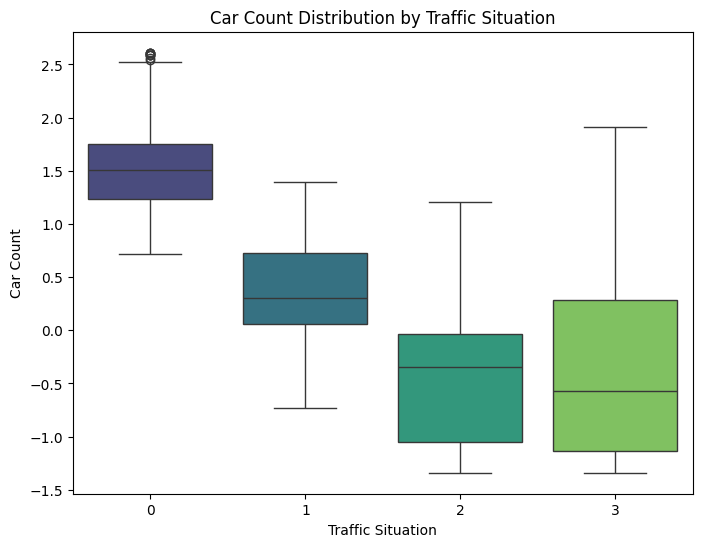

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Traffic Situation', y='CarCount', palette='viridis')
plt.title('Car Count Distribution by Traffic Situation')
plt.xlabel('Traffic Situation')
plt.ylabel('Car Count')
plt.show()

# Split the Dataset

1. **Define Features and Target**: Separate the dataset into features (`X`) and the target variable (`y`).

2. **Train-Test Split**: Use the `train_test_split` function from `sklearn.model_selection` to split the data.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df[['Day of the week', 'CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total']]
y = df['Traffic Situation']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and Train the Classifiers

## Bagging
Chose the bagging model to go with and initialize and train a the model.

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
base_model = DecisionTreeClassifier()
bagging_model = BaggingClassifier(base_estimator=base_model, n_estimators=50, random_state=42)

In [ ]:
bagging_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=50,
                  random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
y_pred = bagging_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.8993677555321391


### Evaluate the model performance

In [ ]:
y_pred = bagging_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8993677555321391


In [ ]:
bagging_model = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)

In [ ]:
bagging_model.fit(X_train, y_train)

y_pred = bagging_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.8993677555321391
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       332
           1       0.82      0.77      0.80       162
           2       0.73      0.74      0.73       237
           3       0.92      0.92      0.92      1167

    accuracy                           0.90      1898
   macro avg       0.87      0.86      0.86      1898
weighted avg       0.90      0.90      0.90      1898

Confusion Matrix:
[[ 332    0    0    0]
 [   0  125    0   37]
 [   0    0  176   61]
 [   0   27   66 1074]]


## Boosting
Chose the Boosting model to go with and initialize and train a the model.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

NameError: name 'AdaBoostClassifier' is not defined

### Evaluate the model performance

## Stacking Classifier
Combine the previous classifiers as the base models using a Stacking Classifier.

### Define meta-learner (LogisticRegression)

### Initialize and Train the Stacking Classifier

Stacking combines multiple models (base learners) using a meta-learner. The meta-learner is trained on the predictions of the base learners to make the final prediction.

### Evaluate the model performance

# Notebook Questions:

After completing the tasks in this notebook, take some time to reflect on the work you have done and answer the following questions. These questions are designed to help you think critically about the steps you took and the decisions you made.

* **Feature Selection and Engineering**
   - Which features did you find most important for predicting churn, and why do you think they are significant?
   - Did you perform any feature engineering? If so, what new features did you create, and how did they improve the model performance?

* **Model Selection**
   - Why did you choose the specific ensemble methods you implemented? What are the advantages of using ensemble methods over single models?
   - Compare the performance of different models you used. Which model performed the best, and what do you think contributed to its success?

* **Model Evaluation**
   - Which evaluation metrics did you use to assess the model performance, and why? What insights did these metrics provide about the models' strengths and weaknesses?


# Answer here: